In [27]:
import re
import string

import os
import datetime

from collections import defaultdict, Counter

rcve = r'CVE[ _+-]?[0-9]{4}[ _+-]?[0-9]{4,}'
crcve = re.compile(rcve)

path_list = [os.path.join(dirpath,filename) for dirpath, _, filenames in os.walk('..') for filename in filenames if filename.endswith('.json')]
path_list = { p.split("/")[-1].split(".")[0] : p for p in path_list }

tmap = "".maketrans(" _+", "---")
def fix_CVE_name(name):
    return name.translate(tmap)

cve_map = defaultdict(Counter)
cve_date = defaultdict(Counter)
error_count = 0

with open("requirements_and_CVE.txt") as f, open("projects_with_CVE_fix.txt") as proj:
    for l in f:
        pline = proj.readline()
        pname = pline.split(";")[1]
        cid, cuser, ctime, ctz, cmsg = l.split(";")

        match = crcve.findall(l)
        for m in match: 
            fcve = fix_CVE_name(m)
            year = fcve[4:8]
            cve_map[fcve][pname] += 1
            cve_date[fcve][datetime.date.fromtimestamp(int(ctime))] += 1
            if fcve  not in path_list:
                error_count += 1
                print(fcve)
        if not match:
            print("error ", l)
print(error_count)

for cve in cve_map:
    if len(cve_map[cve]) > 100:
        print(cve, cve_map[cve])


CVE-2019011324
CVE-2019011324
2
CVE-2019-10906 Counter({'chaoss_augur\n': 4, 'spgreen_psTrace\n': 4, 'f5devcentral_f5go\n': 4, 'CATReloaded_Kawn\n': 3, 'U8NWXD_scorevideo_lib\n': 3, 'ARMmbed_mbed-os\n': 3, 'elifesciences_elife-dashboard\n': 3, 'boutproject_BOUT-dev\n': 3, 'gavz_nmap-cluster\n': 3, 'gitbox.apache.org_repos_asf/superset\n': 2, 'wellcometrust_reach\n': 2, 'StartupsPoleEmploi_labonneboite\n': 2, 'twindb_backup\n': 2, 'growwithgooglema_gwg-mbta\n': 2, 'pinterest_snappass\n': 2, 'pa-yourserveradmin-com_toggl2pl\n': 2, 'acastaing_pkr\n': 2, 'getodk_docs\n': 2, 'CryptoGuardOSS_cryptoguard\n': 2, 'nu-rust-course_rust-course-github-bot\n': 2, 'br3ndonland_udacity-fsnd-flask-catalog\n': 2, 'drael_telegram-notify-vanhack\n': 2, 'dhose_turfgame_exporter\n': 2, 'civisanalytics_toy-flask-api\n': 2, 'nauhpc_doppler\n': 2, 'codethechange_culturemeshffb\n': 2, 'rst2pdf_rst2pdf\n': 2, 'data61_anonlink-encoding-service\n': 2, 'jasonaowen_recurse-faces\n': 2, 'tilezen_tilequeue\n': 2, 'Cod

In [7]:
import pandas as pd

In [8]:
df = pd.DataFrame(cve_map)

In [9]:
df.notna().sum(axis=0)

CVE-2019-19118    13
CVE-2014-0472      2
CVE-2014-0473      1
CVE-2019-12387     7
CVE-2020-11538    12
                  ..
CVE-2019-16785     1
CVE-2019-19274     1
CVE-2013-1445      1
CVE-2020-5215      1
CVE-2020-35654     1
Length: 209, dtype: int64

In [19]:
import seaborn as sns

In [20]:
d = pd.DataFrame(df.notna().sum(axis=0), columns=['y'])
d['x']=d.index

<AxesSubplot: ylabel='Count'>

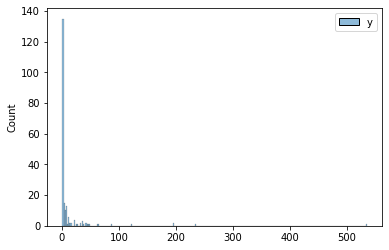

In [21]:
sns.histplot(d)

In [22]:
d.describe()

,y
count,209.000000
mean,12.717703
std,45.930358
min,1.000000
25%,1.000000
50%,2.000000
75%,7.000000
max,535.000000


In [23]:
d.median()

/tmp/ipykernel_1054371/3286961719.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  d.median()


y    2.0
dtype: float64

In [24]:
cve_date

defaultdict(collections.Counter,
            {'CVE-2019-19118': Counter({datetime.timedelta(days=338): 4,
                      datetime.timedelta(days=343): 1,
                      datetime.timedelta(days=350): 1,
                      datetime.timedelta(days=377): 1,
                      datetime.timedelta(days=487): 4,
                      datetime.timedelta(days=340): 1,
                      datetime.timedelta(days=339): 1,
                      datetime.timedelta(days=352): 1,
                      datetime.timedelta(days=407): 1,
                      datetime.timedelta(days=378): 1}),
             'CVE-2014-0472': Counter({datetime.timedelta(days=147): 1,
                      datetime.timedelta(days=2457): 1}),
             'CVE-2014-0473': Counter({datetime.timedelta(days=147): 1}),
             'CVE-2019-12387': Counter({datetime.timedelta(days=161): 2,
                      datetime.timedelta(days=183): 1,
                      datetime.timedelta(days=175): 2,
          

In [25]:
pd.DataFrame(cve_date)

,CVE-2019-19118,CVE-2014-0472,CVE-2014-0473,CVE-2019-12387,CVE-2020-11538,CVE-2020-10177,CVE-2020-10379,CVE-2020-10994,CVE-2020-9402,CVE-2019-10906,...,CVE-2015-5144,CVE-2019-12300,CVE-2015-8213,CVE-2019-5729,CVE-2019-16789,CVE-2019-16785,CVE-2019-19274,CVE-2013-1445,CVE-2020-5215,CVE-2020-35654
338 days,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
343 days,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
350 days,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
377 days,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
487 days,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159 days,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35 days,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230 days,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2092 days,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: >

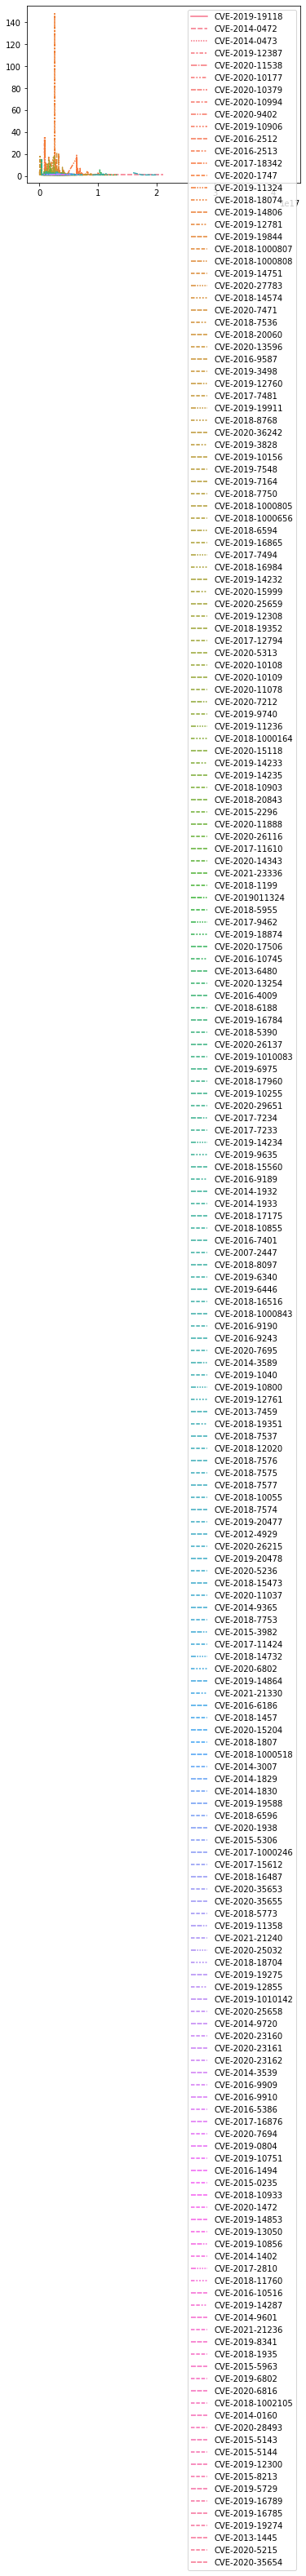

In [26]:
sns.lineplot(pd.DataFrame(cve_date))

In [38]:
import json

ok


In [47]:
for p in cve_map:
    try:
        cvedetails = json.load(open(path_list[p]))
        if 'DATE_PUBLIC'  in  cvedetails['CVE_data_meta']: 
            print(p)
    except:
        pass

CVE-2021-23336
CVE-2018-1199
CVE-2020-7695
CVE-2019-10800
CVE-2018-1457
CVE-2020-7694
CVE-2018-11760
CVE-2018-1935
CVE-2020-28493


In [4]:
datetime.date(2019,1,1)

datetime.date(2019, 1, 1)

In [37]:
cve_db = defaultdict(dict)
for c in cve_date:
    a = sorted(cve_date[c].keys())
    cve_db[c]['delta']= a[-1] - a[0]
    cve_db[c]['count']=sum(cve_date[c].values())
    

In [45]:
df = pd.DataFrame(cve_db)

In [36]:
sum(Counter().values())

0

In [47]:
df = df.T

In [56]:
df[(df['count'] > 2) & (df['delta'] > datetime.timedelta(0))]

,delta,count
CVE-2019-19118,149 days,16
CVE-2019-12387,81 days,9
CVE-2020-11538,73 days,14
CVE-2020-10177,73 days,11
CVE-2020-10379,73 days,11
...,...,...
CVE-2019-11358,25 days,4
CVE-2019-19275,52 days,4
CVE-2019-12855,174 days,3
CVE-2019-1010142,103 days,4


In [51]:
df['delta'] > datetime.timedelta(0)

CVE-2019-19118     True
CVE-2014-0472      True
CVE-2014-0473     False
CVE-2019-12387     True
CVE-2020-11538     True
                  ...  
CVE-2019-16785    False
CVE-2019-19274    False
CVE-2013-1445     False
CVE-2020-5215     False
CVE-2020-35654    False
Name: delta, Length: 209, dtype: bool

In [57]:
df.describe()

,delta
count,209
mean,139 days 04:01:08.899521532
std,255 days 02:49:02.122513320
min,0 days 00:00:00
25%,0 days 00:00:00
50%,12 days 00:00:00
75%,174 days 00:00:00
max,2310 days 00:00:00


In [59]:
df['count'].describe()

count     209
unique     44
top         1
freq       60
Name: count, dtype: int64

In [61]:
df[(df['delta'] > datetime.timedelta(0))].describe()

,delta
count,124
mean,234 days 13:32:54.193548388
std,295 days 19:26:22.911910472
min,1 days 00:00:00
25%,39 days 18:00:00
50%,124 days 12:00:00
75%,340 days 12:00:00
max,2310 days 00:00:00


In [64]:
df[df['count']>30]

,delta,count
CVE-2019-10906,516 days,246
CVE-2017-18342,960 days,273
CVE-2019-11324,440 days,336
CVE-2018-18074,819 days,716
CVE-2019-14806,498 days,58
CVE-2019-12781,69 days,41
CVE-2019-19844,159 days,65
CVE-2018-14574,294 days,86
CVE-2020-7471,112 days,51
CVE-2018-20060,694 days,119
